## Dataset Arboles de Decisión – Red Wine Quality: 

------
CARGA DE LIBRERIAS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE



------------
CARGA DEL DATASET

In [5]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


------
ANALISIS GENERAL DE LOS DATOS

- Dimension del dataset (registros, atributos):

In [8]:
data.shape

(1599, 12)

- Estadisticas basicas X atributo:

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Valores nulos X atributo:

In [12]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

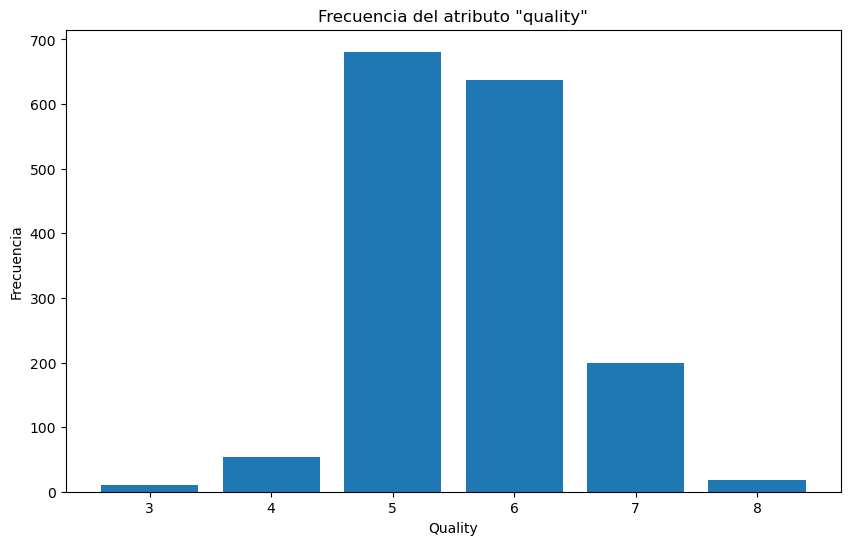

In [13]:
""" Variable de salida (basada en datos sensoriales, puntuación entre 0 y 10)."""

plt.figure(figsize=(10,6)) 
categoria_col = data['quality']
conteo_quality = categoria_col.value_counts()
plt.bar(conteo_quality.index, conteo_quality.values)
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del atributo "quality"')
plt.show()

In [14]:
conteo_valores = data['quality'].value_counts()
print(conteo_valores)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


-----------------------------------------------------------

IDENTIFICACIÓN Y ELIMINACIÓN DE VALORES ATIPICOS:

- Eliminación de valores atipicos: 'fixed acidity':

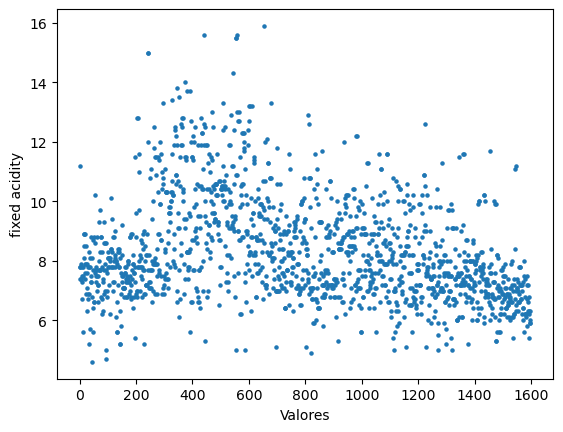

In [17]:
plt.scatter(range(data.shape[0]), data['fixed acidity'], s=5)
plt.xlabel('Valores')
plt.ylabel('fixed acidity')
plt.show()

In [18]:
data.drop(data[data['fixed acidity'] < 5.8].index, inplace=True)
data.drop(data[data['fixed acidity'] > 13].index, inplace=True)

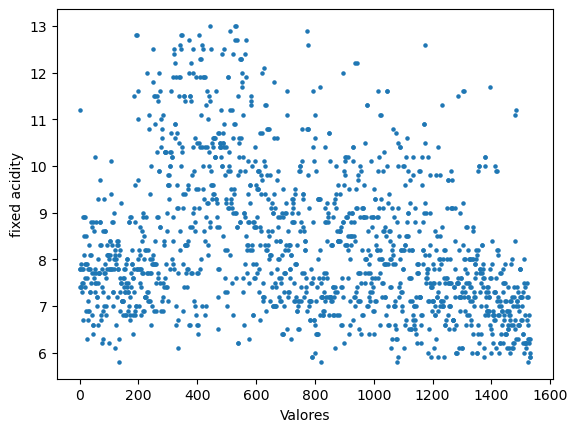

In [19]:
plt.scatter(range(data.shape[0]), data['fixed acidity'], s=5)
plt.xlabel('Valores')
plt.ylabel('fixed acidity')
plt.show()

- Eliminación de valores atipicos: 'volatile acidity':

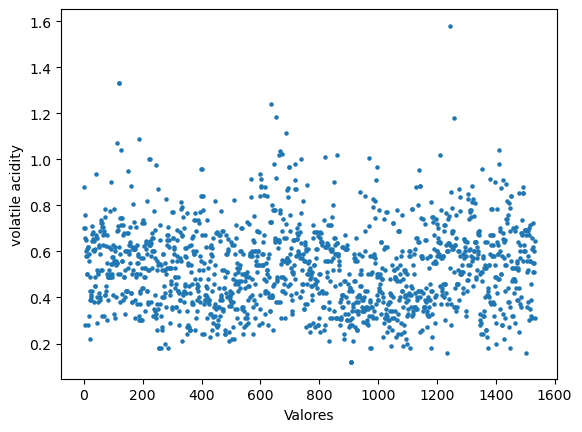

In [21]:
plt.scatter(range(data.shape[0]), data['volatile acidity'], s=5)
plt.xlabel('Valores')
plt.ylabel('volatile acidity')
plt.show()

In [22]:
data.drop(data[data['volatile acidity'] < 0.2].index, inplace=True)
data.drop(data[data['volatile acidity'] > 0.9].index, inplace=True)

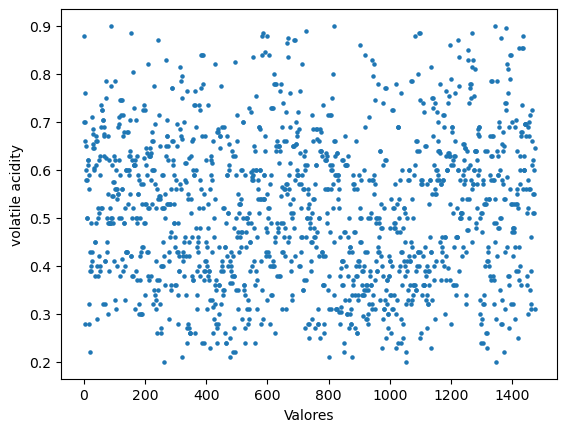

In [23]:
plt.scatter(range(data.shape[0]), data['volatile acidity'], s=5)
plt.xlabel('Valores')
plt.ylabel('volatile acidity')
plt.show()

- Eliminación de valores atipicos: 'citric acid':

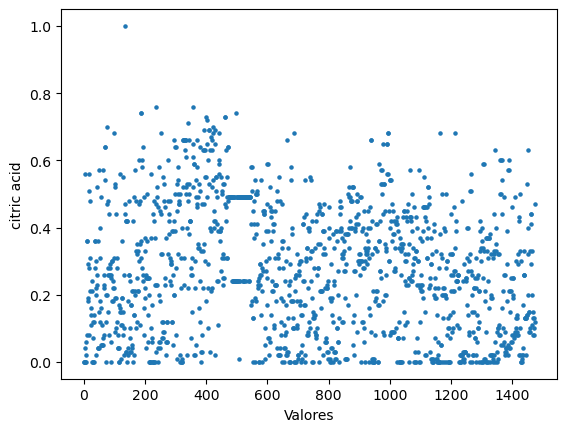

In [25]:
plt.scatter(range(data.shape[0]), data['citric acid'], s=5)
plt.xlabel('Valores')
plt.ylabel('citric acid')
plt.show()

In [26]:
data.drop(data[data['citric acid'] > 0.7].index, inplace=True)

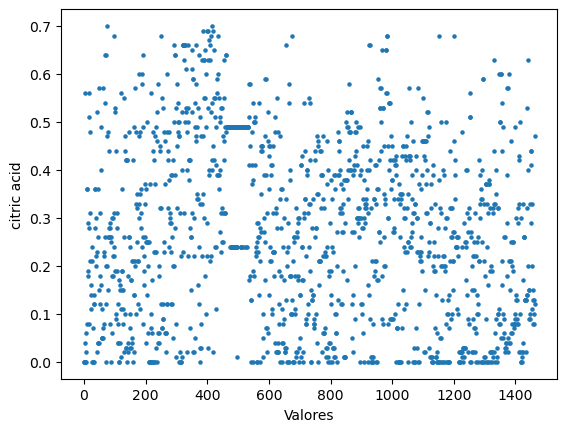

In [27]:
plt.scatter(range(data.shape[0]), data['citric acid'], s=5)
plt.xlabel('Valores')
plt.ylabel('citric acid')
plt.show()

- Eliminación de valores atipicos: 'residual sugar':

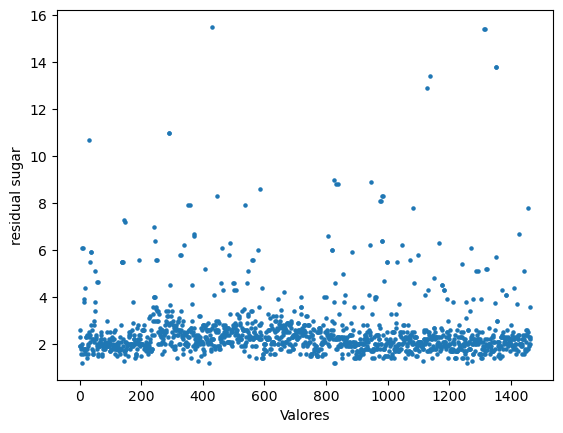

In [29]:
plt.scatter(range(data.shape[0]), data['residual sugar'], s=5)
plt.xlabel('Valores')
plt.ylabel('residual sugar')
plt.show()

In [30]:
data.drop(data[data['residual sugar'] < 1.3].index, inplace=True)
data.drop(data[data['residual sugar'] > 3.6].index, inplace=True)

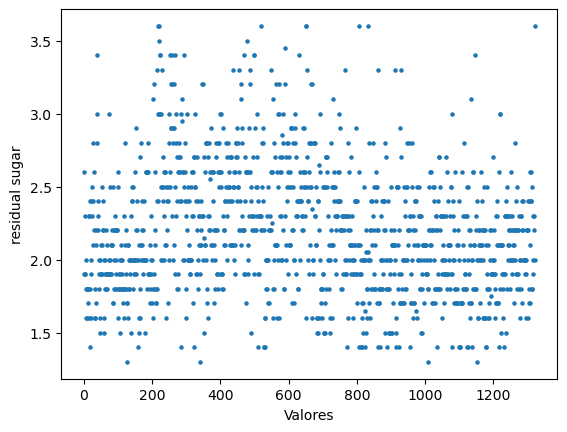

In [31]:
plt.scatter(range(data.shape[0]), data['residual sugar'], s=5)
plt.xlabel('Valores')
plt.ylabel('residual sugar')
plt.show()

- Eliminación de valores atipicos: 'chlorides':

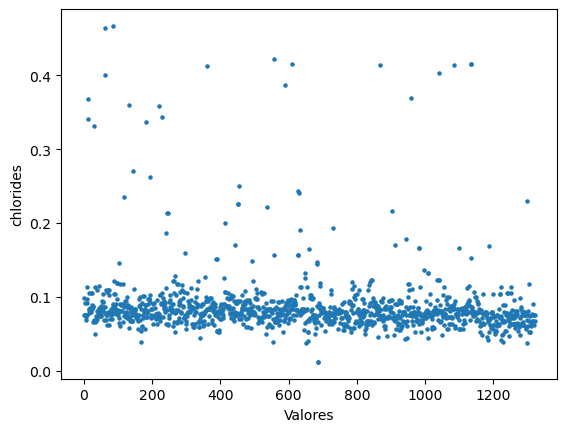

In [33]:
plt.scatter(range(data.shape[0]), data['chlorides'], s=5)
plt.xlabel('Valores')
plt.ylabel('chlorides')
plt.show()

In [34]:
data.drop(data[data['chlorides'] < 0.05].index, inplace=True)
data.drop(data[data['chlorides'] > 0.12].index, inplace=True)

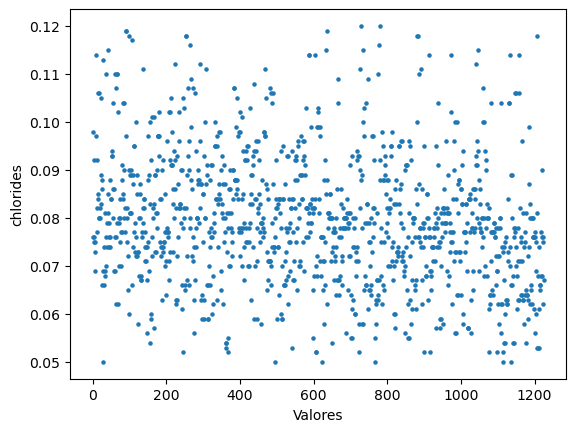

In [35]:
plt.scatter(range(data.shape[0]), data['chlorides'], s=5)
plt.xlabel('Valores')
plt.ylabel('chlorides')
plt.show()

- Eliminación de valores atipicos: 'free sulfur dioxide':

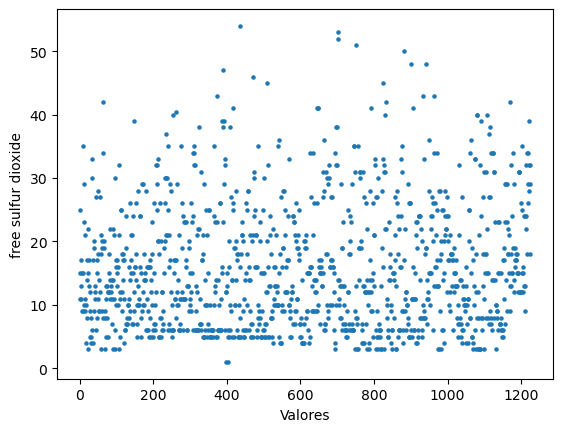

In [37]:
plt.scatter(range(data.shape[0]), data['free sulfur dioxide'], s=5)
plt.xlabel('Valores')
plt.ylabel('free sulfur dioxide')
plt.show()

In [38]:
data.drop(data[data['free sulfur dioxide'] < 3].index, inplace=True)
data.drop(data[data['free sulfur dioxide'] > 40].index, inplace=True)

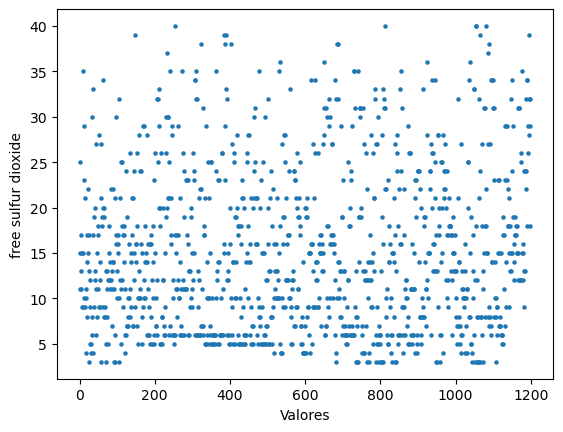

In [39]:
plt.scatter(range(data.shape[0]), data['free sulfur dioxide'], s=5)
plt.xlabel('Valores')
plt.ylabel('free sulfur dioxide')
plt.show()

- Eliminación de valores atipicos: 'total sulfur dioxide':

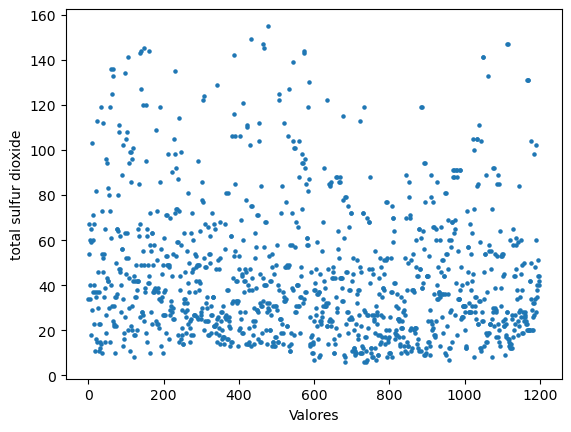

In [41]:
plt.scatter(range(data.shape[0]), data['total sulfur dioxide'], s=5)
plt.xlabel('Valores')
plt.ylabel('total sulfur dioxide')
plt.show()

In [42]:
data.drop(data[data['total sulfur dioxide'] > 120].index, inplace=True)

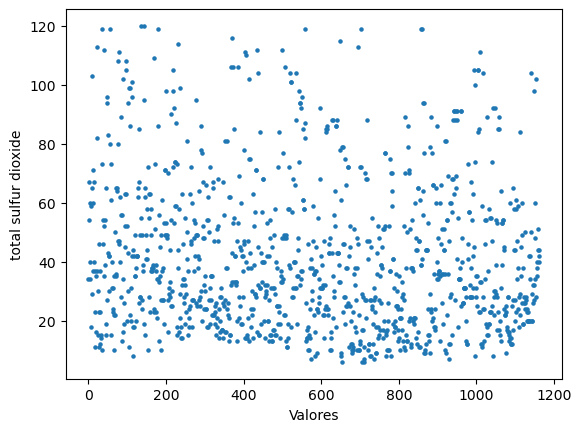

In [43]:
plt.scatter(range(data.shape[0]), data['total sulfur dioxide'], s=5)
plt.xlabel('Valores')
plt.ylabel('total sulfur dioxide')
plt.show()

- Eliminación de valores atipicos: 'density':

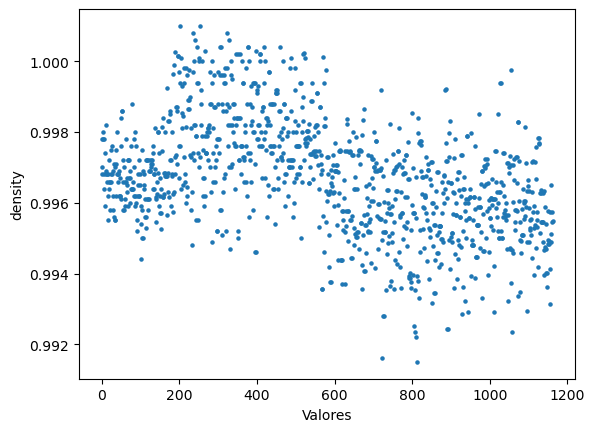

In [45]:
plt.scatter(range(data.shape[0]), data['density'], s=5)
plt.xlabel('Valores')
plt.ylabel('density')
plt.show()

In [46]:
data.drop(data[data['density'] < 0.992].index, inplace=True)
data.drop(data[data['density'] > 1.002].index, inplace=True)

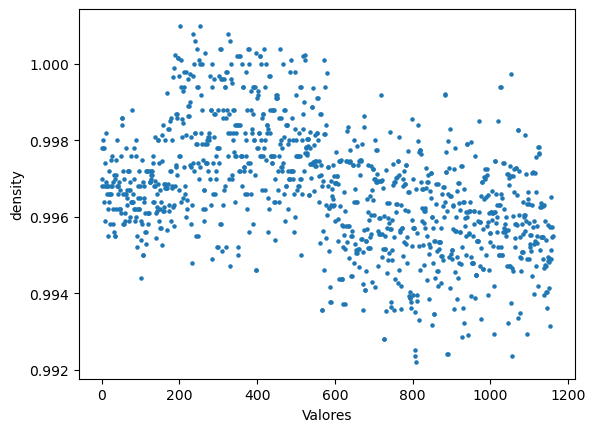

In [47]:
plt.scatter(range(data.shape[0]), data['density'], s=5)
plt.xlabel('Valores')
plt.ylabel('density')
plt.show()

- Eliminación de valores atipicos: 'pH':

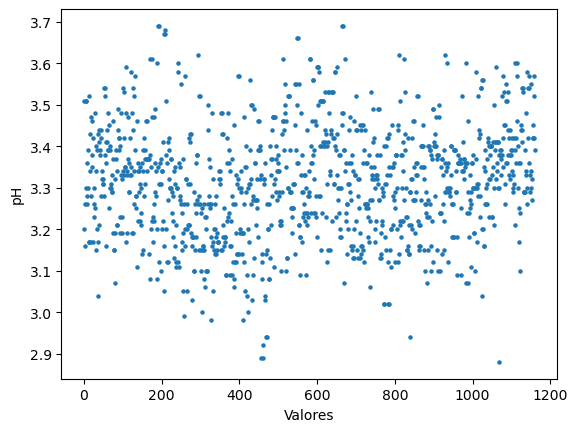

In [49]:
plt.scatter(range(data.shape[0]), data['pH'], s=5)
plt.xlabel('Valores')
plt.ylabel('pH')
plt.show()

In [50]:
data.drop(data[data['pH'] < 3.0].index, inplace=True)
data.drop(data[data['pH'] > 3.65].index, inplace=True)

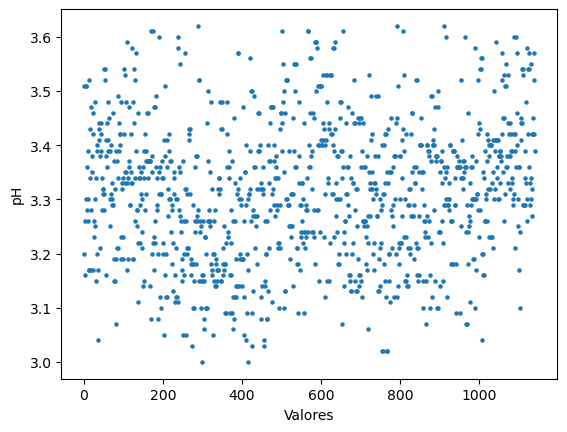

In [51]:
plt.scatter(range(data.shape[0]), data['pH'], s=5)
plt.xlabel('Valores')
plt.ylabel('pH')
plt.show()

- Eliminación de valores atipicos: 'sulphates':

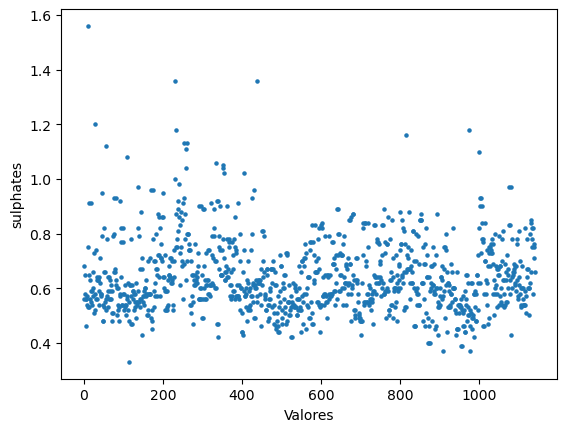

In [53]:
plt.scatter(range(data.shape[0]), data['sulphates'], s=5)
plt.xlabel('Valores')
plt.ylabel('sulphates')
plt.show()

In [54]:
data.drop(data[data['sulphates'] < 0.45].index, inplace=True)
data.drop(data[data['sulphates'] > 0.9].index, inplace=True)

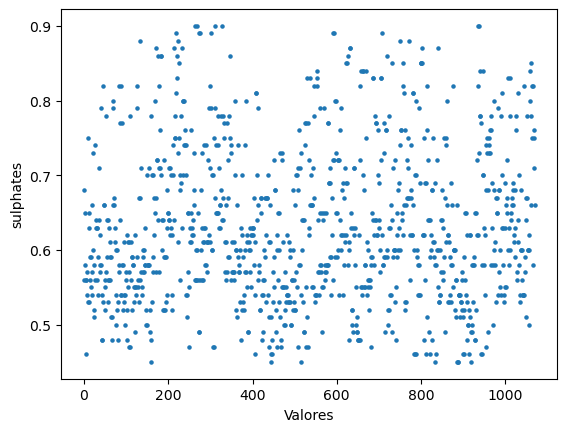

In [55]:
plt.scatter(range(data.shape[0]), data['sulphates'], s=5)
plt.xlabel('Valores')
plt.ylabel('sulphates')
plt.show()

- Eliminación de valores atipicos: 'alcohol':

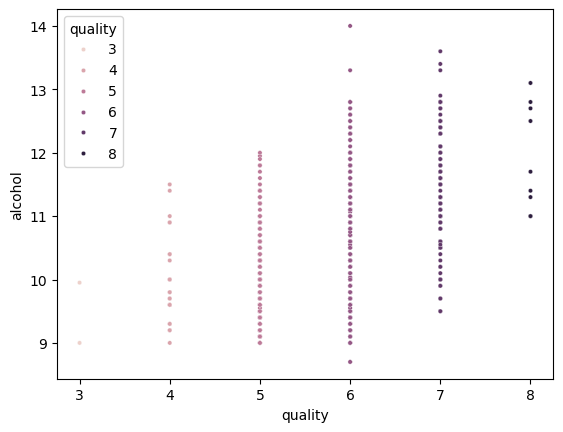

In [57]:
sbn.scatterplot (x="quality", y ="alcohol", hue="quality", data=data, s=10);

In [58]:
data.drop(data[(data['alcohol'] > 11.5) & (data['quality']==4)].index, inplace=True)

data.drop(data[(data['alcohol'] < 9.2) & (data['quality']==5)].index, inplace=True)
data.drop(data[(data['alcohol'] > 12) & (data['quality']==5)].index, inplace=True)

data.drop(data[(data['alcohol'] < 9.5) & (data['quality']==6)].index, inplace=True)
data.drop(data[(data['alcohol'] > 13) & (data['quality']==6)].index, inplace=True)


data.drop(data[(data['alcohol'] < 9.8) & (data['quality']==7)].index, inplace=True)
data.drop(data[(data['alcohol'] > 13.5) & (data['quality']==7)].index, inplace=True)

data.drop(data[(data['alcohol'] < 11) & (data['quality']==8)].index, inplace=True)

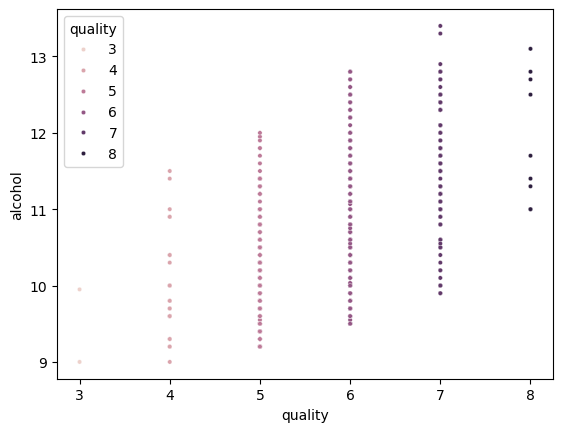

In [59]:
sbn.scatterplot (x="quality", y ="alcohol", hue="quality", data=data, s=10);

- Dimension del dataset tras la imputación de valores atipicos:

In [61]:
data.shape

(992, 12)

-----------------------
HISTOGRAMAS OBTENIDOS X ATRIBUTO

- Histograma 'fixed acidity':

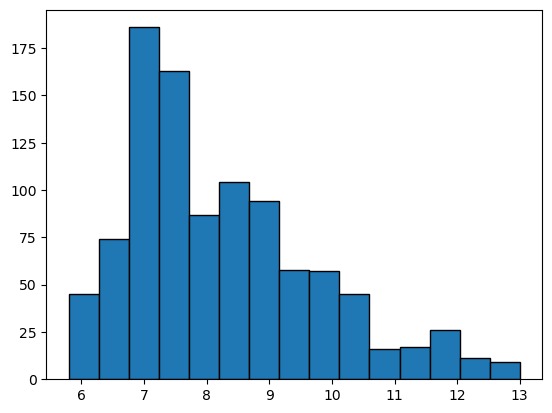

In [64]:
""" La mayoría de los ácidos implicados en el vino son fijos o no volátiles (no se evaporan fácilmente)."""

plt.hist(data['fixed acidity'], bins= 15, ec='black');

- Histograma 'volatile acidity':

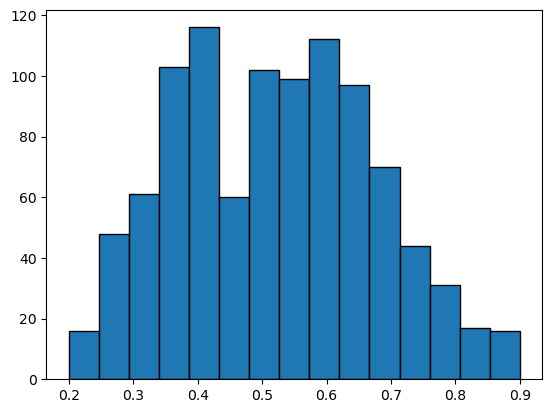

In [66]:
""" La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre."""

plt.hist(data['volatile acidity'], bins= 15, ec='black');

- Histograma 'citric acid:

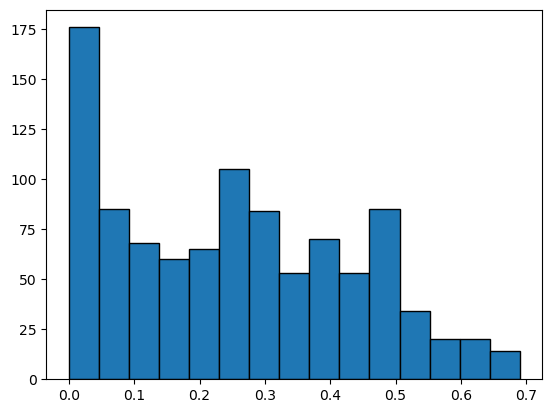

In [68]:
""" Presente en pequeñas cantidades, el ácido cítrico puede añadir "frescura" y sabor a los vinos."""

plt.hist(data['citric acid'], bins= 15, ec='black');

- Histograma 'residual sugar':

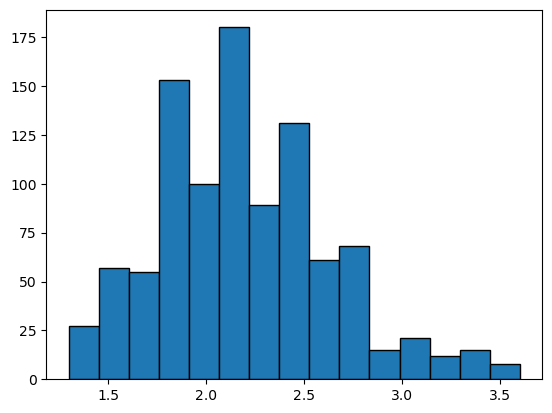

In [70]:
""" La cantidad de azúcar que queda después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro 
y los vinos con más de 45 gramos/litro se consideran dulces."""

plt.hist(data['residual sugar'], bins= 15, ec='black');

- Histograma 'chlorides':

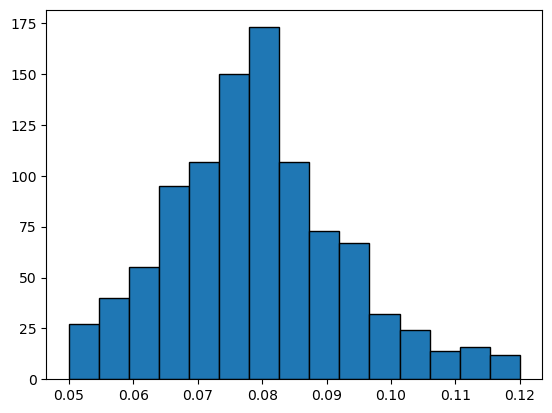

In [72]:
""" La cantidad de sal en el vino."""

plt.hist(data['chlorides'], bins= 15, ec='black');

- Histograma 'free sulfur dioxide':

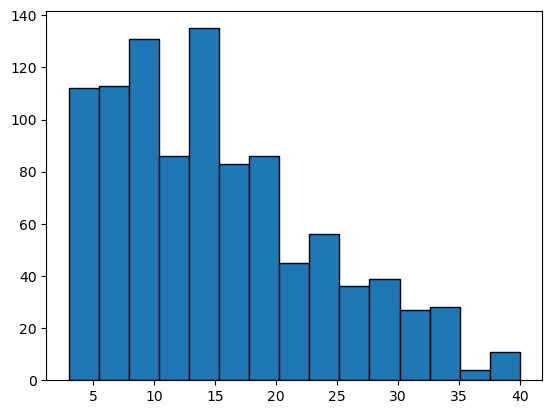

In [74]:
""" La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; 
evita el crecimiento microbiano y la oxidación del vino."""

plt.hist(data['free sulfur dioxide'], bins= 15, ec='black');

- Histograma 'total sulfur dioxide':

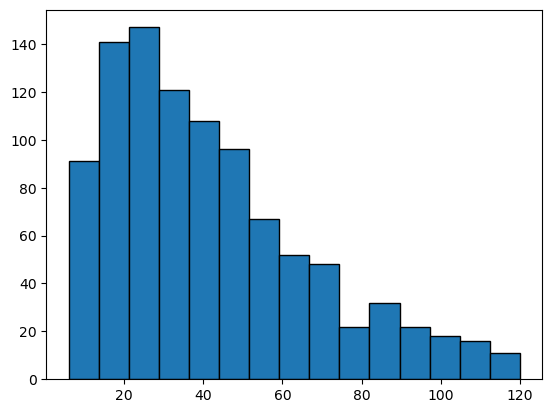

In [76]:

""" Cantidad de formas libres y ligadas de SO2; en concentraciones bajas, el SO2 es mayormente indetectable en el vino, 
pero en concentraciones de SO2 libre superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino."""

plt.hist(data['total sulfur dioxide'], bins= 15, ec='black');

- Histograma 'density':

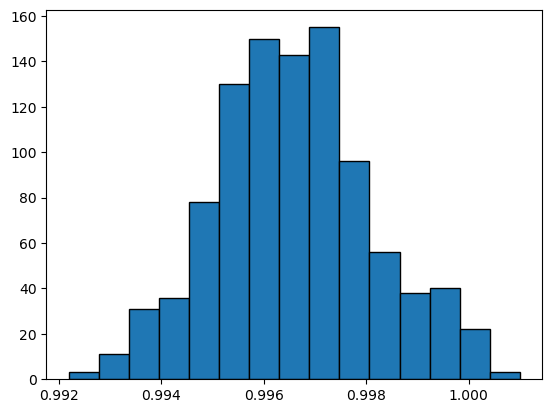

In [78]:

""" La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar."""

plt.hist(data['density'], bins= 15, ec='black');

- Histograma 'pH':

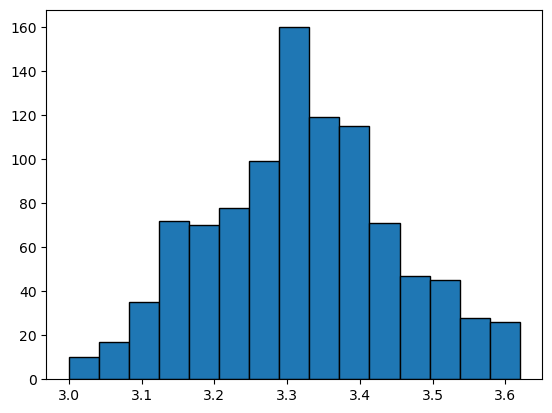

In [80]:

""" Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); 
la mayoría de los vinos están entre 3 y 4 en la escala de pH."""

plt.hist(data['pH'], bins= 15, ec='black');

- Histograma 'sulphates':

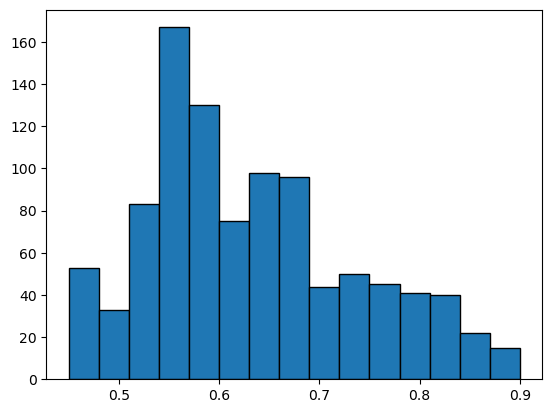

In [82]:
""" Un aditivo para el vino que puede contribuir a los niveles de gas de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante."""

plt.hist(data['sulphates'], bins= 15, ec='black');

- Histograma 'alcohol':

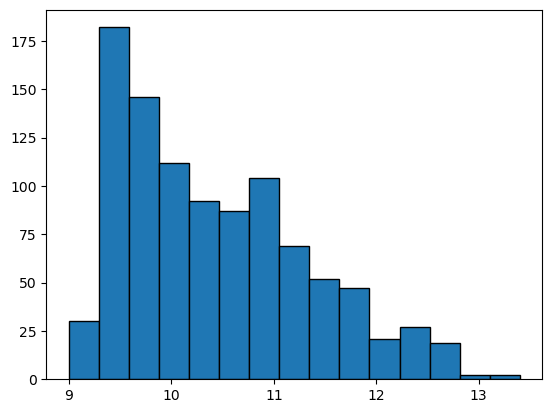

In [84]:
""" El porcentaje de contenido de alcohol del vino."""

plt.hist(data['alcohol'], bins= 15, ec='black');

- Grafico de barras 'quality':

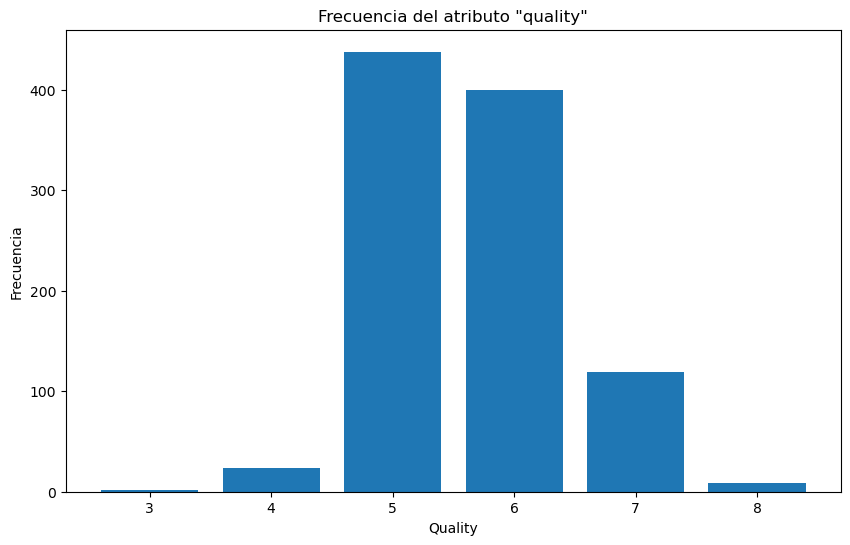

In [86]:
""" Variable de salida (basada en datos sensoriales, puntuación entre 0 y 10)."""

plt.figure(figsize=(10,6)) 
categoria_col = data['quality']
conteo_quality = categoria_col.value_counts()
plt.bar(conteo_quality.index, conteo_quality.values)
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del atributo "quality"')
plt.show()

----------
CORRELACION ENTRE VARIABLES

In [88]:
correlacion = data.corr(method='pearson')

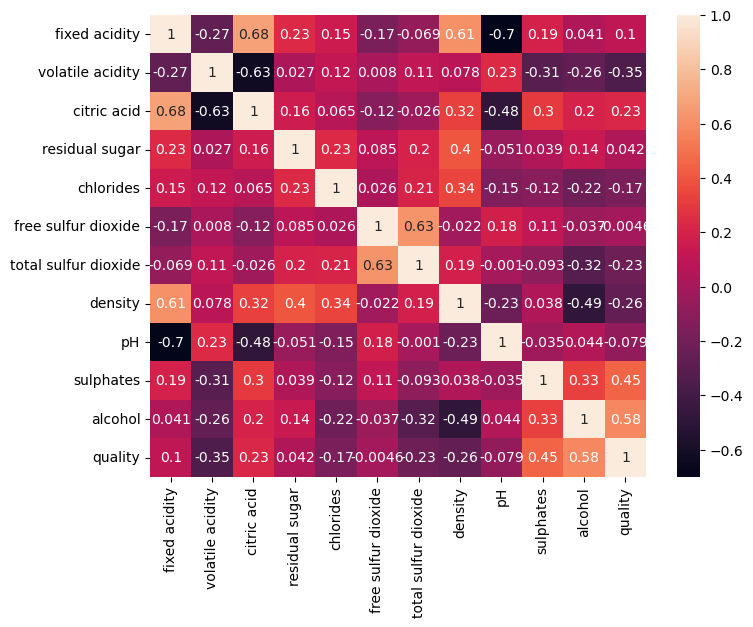

In [89]:
plt.figure(figsize=(8,6))
sbn.heatmap(correlacion, annot=True)
plt.show()

------
ARBOL DE DECISIONES

- Construcción del arbol de decisiones:

In [92]:
predictors_col = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'fixed acidity', 'density', 'total sulfur dioxide','free sulfur dioxide']
target_col = ["quality"]

In [93]:
predictors = data [predictors_col]
target = data [target_col]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size =0.2, random_state=42)

In [95]:
tree = DecisionTreeClassifier()

In [96]:
arbol = tree.fit(X_train, y_train)

- Matriz de confusión:

In [98]:
predicciones = arbol.predict(X_test)

In [99]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Calidad_Real'], colnames=['Calidad_Predecida'])

Calidad_Predecida,5,6,7
Calidad_Real,,,
5,74,16,1
6,19,59,10
7,4,5,10
8,0,1,0


- Puntuaciones:

In [101]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.7185929648241206

In [102]:
precision = precision_score(y_test, predicciones, average='weighted', zero_division=0)
precision

0.7164274617692911

In [103]:
recall = recall_score(y_test, predicciones, average='weighted', zero_division=0)
recall

0.7185929648241206

In [104]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.7164928887165275

- Eliminación recursiva de caracteristicas (RFE):

In [106]:
rfe = RFE(estimator=tree, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [107]:
selected_features_rfe = rfe.support_
selected_feature_names_rfe = [data.columns[i] for i in range(len(selected_features_rfe)) if selected_features_rfe[i]]


print("Características seleccionadas por RFE:", selected_feature_names_rfe)

Características seleccionadas por RFE: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']


- GridSearchCV:

In [109]:
param_grid = {
    'criterion': ['gini','entropy'],           
    'splitter': ['random','best'],             
    'max_depth': [None, 5, 7, 9], 
    'min_samples_leaf': [1, 3, 5, 7], 
    'min_samples_split': [2, 4, 6, 8, 10]           
          
}

In [110]:
grid_search = GridSearchCV(estimator=tree, param_grid = param_grid, cv=2, scoring='accuracy', n_jobs=-1)

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [112]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [113]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Exactitud en el conjunto de prueba: {accuracy_score(y_test, y_pred)}")

Exactitud en el conjunto de prueba: 0.6482412060301508
